Matplotlib - plt

In [57]:
# Matplotlib 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

path = '../data/raw_sales.csv'

pd.read_csv(path)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [58]:
raw = pd.read_csv(path, parse_dates=['datesold'])
# parse_dates=['datesold'] : 지정된 열을 날짜/시간 형식으로 자동 변환 
# 변환된 'datesold' datetime 형식으로 변환됨 

sales = raw.copy()

sales.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3


In [59]:
sales.shape

(29580, 5)

In [60]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [61]:
# 연도만 추출 

sales['datesold']

0       2007-02-07
1       2007-02-27
2       2007-03-07
3       2007-03-09
4       2007-03-21
           ...    
29575   2019-07-25
29576   2019-07-25
29577   2019-07-26
29578   2019-07-26
29579   2019-07-26
Name: datesold, Length: 29580, dtype: datetime64[ns]

In [62]:
sales['datesold'].dt.year

0        2007
1        2007
2        2007
3        2007
4        2007
         ... 
29575    2019
29576    2019
29577    2019
29578    2019
29579    2019
Name: datesold, Length: 29580, dtype: int32

In [63]:
sales['year'] = sales['datesold'].dt.year 
# 연도만 추출 >> 연도 새 열 생성

sales.head(1)

,datesold,postcode,price,propertyType,bedrooms,year
0,2007-02-07,2607,525000,house,4,2007


In [64]:
# 연도별 평균가격 

sales.groupby('year')['price'].agg("mean")

year
2007    522377.210884
2008    493814.162754
2009    496092.032959
2010    559564.810289
2011    566715.110227
2012    552501.369214
2013    553416.296838
2014    592653.761439
2015    626101.342654
2016    635185.311668
2017    671880.551420
2018    660701.042768
2019    634184.218773
Name: price, dtype: float64

In [65]:
round(sales.groupby('year')['price'].agg("mean"), 1)

year
2007    522377.2
2008    493814.2
2009    496092.0
2010    559564.8
2011    566715.1
2012    552501.4
2013    553416.3
2014    592653.8
2015    626101.3
2016    635185.3
2017    671880.6
2018    660701.0
2019    634184.2
Name: price, dtype: float64

In [66]:
result = round(sales.groupby('year')['price'].agg("mean"), 1)
result[:5]

year
2007    522377.2
2008    493814.2
2009    496092.0
2010    559564.8
2011    566715.1
Name: price, dtype: float64

In [67]:
result.index

Index([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019],
      dtype='int32', name='year')

In [68]:
result.values

array([522377.2, 493814.2, 496092. , 559564.8, 566715.1, 552501.4,
       553416.3, 592653.8, 626101.3, 635185.3, 671880.6, 660701. ,
       634184.2])

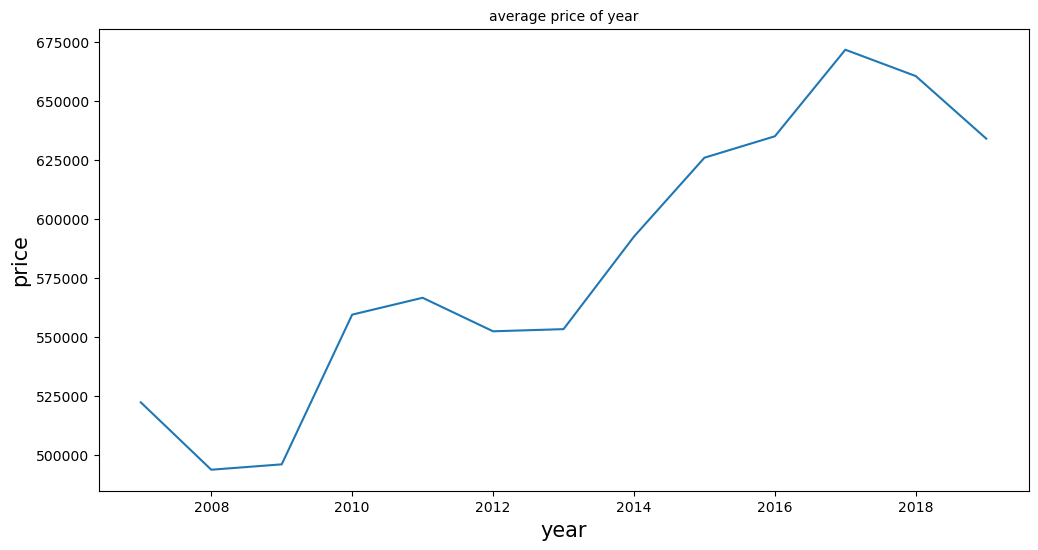

In [69]:
# 시간의 변동에 따른 추세를 보고 싶어요. 
# 선 그래프(line graph)

fig, ax = plt.subplots(figsize=(12,6)) # 도화지 

ax.plot(result.index, result.values) #plot(x, y)

ax.set_title('average price of year', size=10)
ax.set_xlabel('year', size=15)
ax.set_ylabel('price', size=15)

plt.savefig('../data/img/average price of year.png')

plt.show()

In [70]:
# 막대그래프 (bar graph)

sales.head(1)

,datesold,postcode,price,propertyType,bedrooms,year
0,2007-02-07,2607,525000,house,4,2007


In [71]:
# 월별 막대그래프를 x 축 기준 
# 2007년, 2008년도 병립


sales['year'] = sales['datesold'].dt.year

In [72]:
sales['month'] = sales['datesold'].dt.month

In [73]:
sales.head(3)

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3


In [74]:
sales['year'].isin([2007,2008,2009])

0         True
1         True
2         True
3         True
4         True
         ...  
29575    False
29576    False
29577    False
29578    False
29579    False
Name: year, Length: 29580, dtype: bool

In [75]:
condition = sales['year'].isin([2007,2008,2009])

sales.loc[condition, :]

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
24802,2009-12-22,2606,335000,unit,2,2009,12
24803,2009-12-22,2606,350000,unit,2,2009,12
24804,2009-12-23,2603,330000,unit,1,2009,12
24805,2009-12-24,2606,366000,unit,2,2009,12


In [76]:
df = sales.loc[condition, :]

df.tail()

,datesold,postcode,price,propertyType,bedrooms,year,month
24802,2009-12-22,2606,335000,unit,2,2009,12
24803,2009-12-22,2606,350000,unit,2,2009,12
24804,2009-12-23,2603,330000,unit,1,2009,12
24805,2009-12-24,2606,366000,unit,2,2009,12
24806,2009-12-24,2617,367000,unit,2,2009,12


In [77]:
# 연도별, 월별 평균 가격을 알고 싶어요 

round(df.groupby(['year','month'])['price'].agg('mean'), 1)

year  month
2007  2        407500.0
      3        339333.3
      4        798000.0
      5        339500.0
      6        520333.3
      7        592078.9
      8        505608.7
      9        556875.0
      10       498600.0
      11       505442.3
      12       505737.0
2008  1        504428.6
      2        531080.0
      3        563500.0
      4        534204.5
      5        522394.7
      6        539092.6
      7        537453.1
      8        449510.4
      9        496778.7
      10       454822.0
      11       489546.3
      12       494410.8
2009  1        482238.6
      2        459281.6
      3        493931.2
      4        497882.6
      5        477808.7
      6        479053.2
      7        495982.1
      8        485465.9
      9        499597.2
      10       501456.3
      11       546882.3
      12       524921.4
Name: price, dtype: float64

In [78]:
result = round(df.groupby(['year','month'])['price'].agg('mean'), 1)

result.head()

year  month
2007  2        407500.0
      3        339333.3
      4        798000.0
      5        339500.0
      6        520333.3
Name: price, dtype: float64

In [79]:
result.index

MultiIndex([(2007,  2),
            (2007,  3),
            (2007,  4),
            (2007,  5),
            (2007,  6),
            (2007,  7),
            (2007,  8),
            (2007,  9),
            (2007, 10),
            (2007, 11),
            (2007, 12),
            (2008,  1),
            (2008,  2),
            (2008,  3),
            (2008,  4),
            (2008,  5),
            (2008,  6),
            (2008,  7),
            (2008,  8),
            (2008,  9),
            (2008, 10),
            (2008, 11),
            (2008, 12),
            (2009,  1),
            (2009,  2),
            (2009,  3),
            (2009,  4),
            (2009,  5),
            (2009,  6),
            (2009,  7),
            (2009,  8),
            (2009,  9),
            (2009, 10),
            (2009, 11),
            (2009, 12)],
           names=['year', 'month'])

In [80]:
result.reset_index().iloc[::3, :]

,year,month,price
0,2007,2,407500.0
3,2007,5,339500.0
6,2007,8,505608.7
9,2007,11,505442.3
12,2008,2,531080.0
15,2008,5,522394.7
18,2008,8,449510.4
21,2008,11,489546.3
24,2009,2,459281.6
27,2009,5,477808.7


In [81]:
result.reset_index()

,year,month,price
0,2007,2,407500.0
1,2007,3,339333.3
2,2007,4,798000.0
3,2007,5,339500.0
4,2007,6,520333.3
5,2007,7,592078.9
6,2007,8,505608.7
7,2007,9,556875.0
8,2007,10,498600.0
9,2007,11,505442.3


In [82]:
result = result.reset_index()

result.head()

,year,month,price
0,2007,2,407500.0
1,2007,3,339333.3
2,2007,4,798000.0
3,2007,5,339500.0
4,2007,6,520333.3


In [83]:
result['year'].unique()

array([2007, 2008, 2009])

In [84]:
result.loc[result['year'] == 2007, :]

,year,month,price
0,2007,2,407500.0
1,2007,3,339333.3
2,2007,4,798000.0
3,2007,5,339500.0
4,2007,6,520333.3
5,2007,7,592078.9
6,2007,8,505608.7
7,2007,9,556875.0
8,2007,10,498600.0
9,2007,11,505442.3


In [85]:
result_2007 = result.loc[result['year'] == 2007, :]
result_2008 = result.loc[result['year'] == 2008, :]
result_2009 = result.loc[result['year'] == 2009, :]

print(result_2007[:3])
print()
print(result_2008[:3])
print()
print(result_2009[:3])
print()

   year  month     price
0  2007      2  407500.0
1  2007      3  339333.3
2  2007      4  798000.0

    year  month     price
11  2008      1  504428.6
12  2008      2  531080.0
13  2008      3  563500.0

    year  month     price
23  2009      1  482238.6
24  2009      2  459281.6
25  2009      3  493931.2



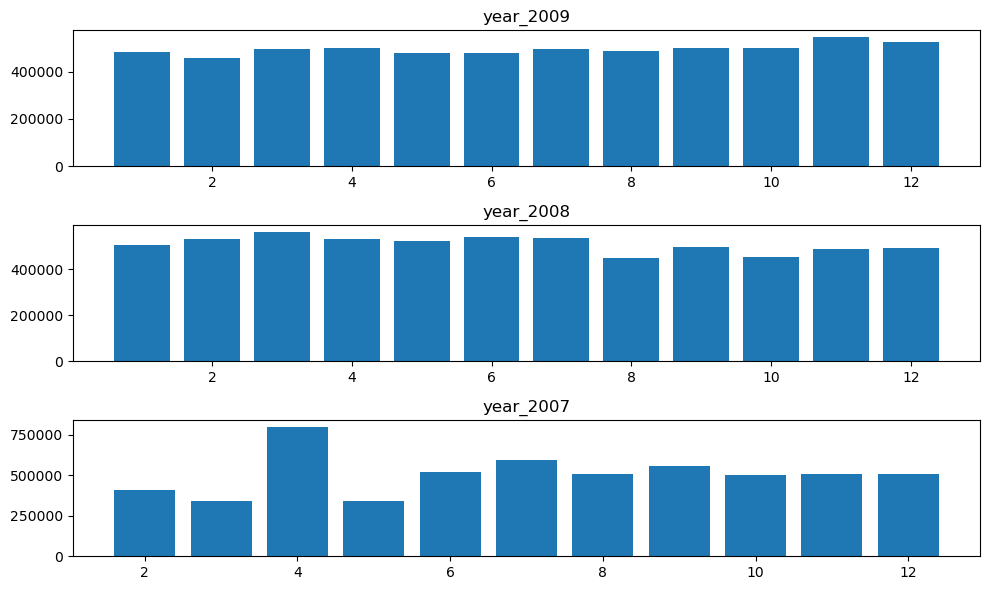

In [86]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,6))

ax[0].bar(result_2009['month'], result_2009['price'])
ax[0].set_title('year_2009')

ax[1].bar(result_2008['month'], result_2008['price'])
ax[1].set_title('year_2008')

ax[2].bar(result_2007['month'], result_2007['price'])
ax[2].set_title('year_2007')

plt.tight_layout()

plt.show()

In [87]:
len(result['year'].unique())

3

In [88]:
type(len(result['year'].unique()))

int

0 2007
1 2008
2 2009


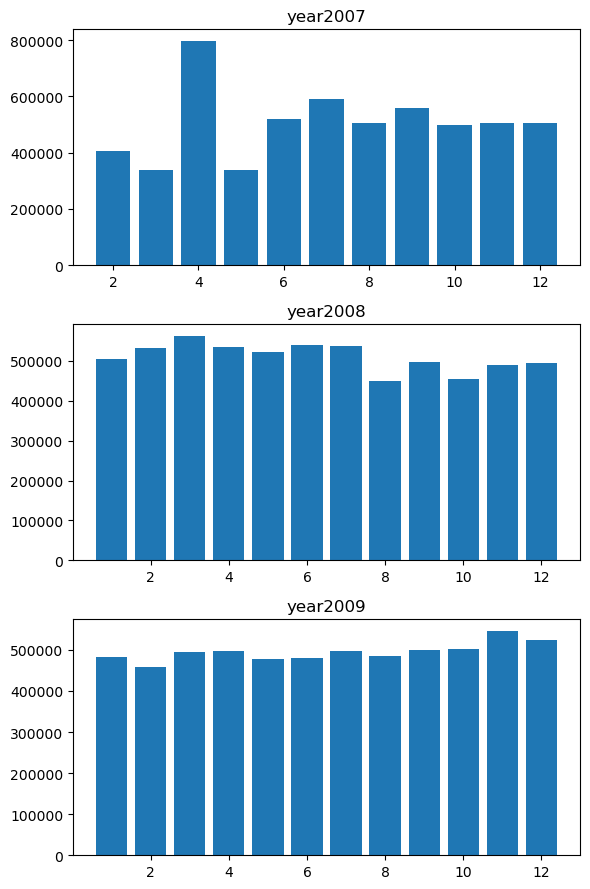

In [89]:
N = int(len(result['year'].unique())) # 2007, 2008, 2009 >> 3

fig, ax = plt.subplots(nrows=N, ncols= 1, figsize=(6, 3*N))

for i, y in enumerate(result['year'].unique()): 
  print(i, y)
  # y : 현재 반복 중인 y (year)
  data = result.loc[result['year'] == y]
  
  ax[i].bar(data['month'], data['price'])
  ax[i].set_title(f'year{y}')
  
plt.tight_layout()
  
plt.show()

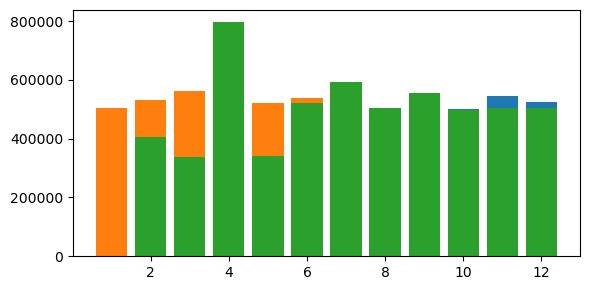

In [90]:
fig, ax = plt.subplots(figsize=(6,3))

ax.bar(result_2009['month'], result_2009['price'])
ax.bar(result_2008['month'], result_2008['price'])
ax.bar(result_2007['month'], result_2007['price'])

plt.tight_layout()
  
plt.show()

Seaborn - sns

In [91]:
import pandas as pd 
import seaborn as sns

sales

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3,2019,7
29576,2019-07-25,2612,560000,unit,2,2019,7
29577,2019-07-26,2912,464950,unit,2,2019,7
29578,2019-07-26,2601,589000,unit,2,2019,7


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


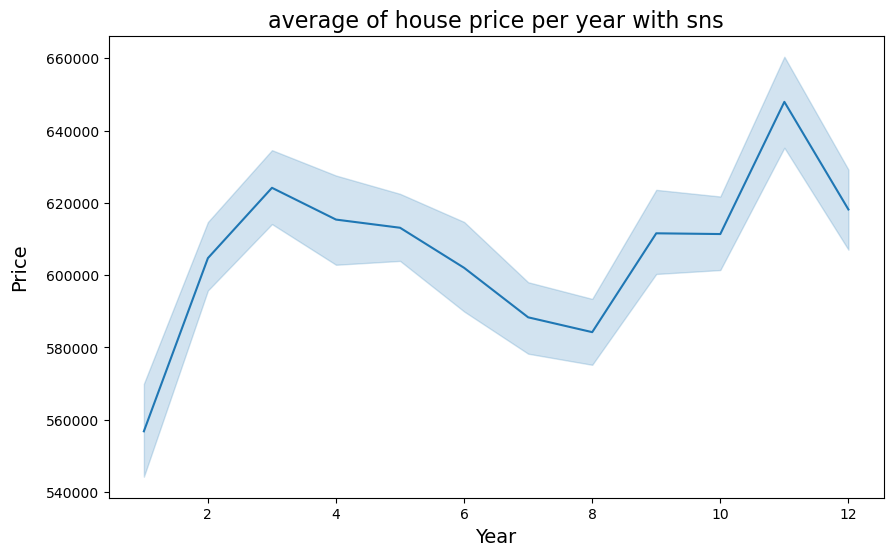

In [92]:
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(data=sales, x = 'month', y = 'price', ax=ax)
ax.set_title('average of house price per year with sns', size=16)
ax.set_xlabel('Year', size=14)
ax.set_ylabel('Price', size=14, labelpad=12)

plt.show()

In [93]:
# barplot / outlier (이상치) 제거 

# 2007 ~ 2010 추출 

print(sales.head())
print()
print(sales.tail())

    datesold  postcode   price propertyType  bedrooms  year  month
0 2007-02-07      2607  525000        house         4  2007      2
1 2007-02-27      2906  290000        house         3  2007      2
2 2007-03-07      2905  328000        house         3  2007      3
3 2007-03-09      2905  380000        house         4  2007      3
4 2007-03-21      2906  310000        house         3  2007      3

        datesold  postcode   price propertyType  bedrooms  year  month
29575 2019-07-25      2900  500000         unit         3  2019      7
29576 2019-07-25      2612  560000         unit         2  2019      7
29577 2019-07-26      2912  464950         unit         2  2019      7
29578 2019-07-26      2601  589000         unit         2  2019      7
29579 2019-07-26      2612  775000         unit         2  2019      7


In [94]:
sales['year'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019])

In [95]:
condition = sales['year'].isin([2007,2008,2009,2010])

In [96]:
df = sales.loc[condition,:]

print(df.head())
print()
print(df.tail())

    datesold  postcode   price propertyType  bedrooms  year  month
0 2007-02-07      2607  525000        house         4  2007      2
1 2007-02-27      2906  290000        house         3  2007      2
2 2007-03-07      2905  328000        house         3  2007      3
3 2007-03-09      2905  380000        house         4  2007      3
4 2007-03-21      2906  310000        house         3  2007      3

        datesold  postcode   price propertyType  bedrooms  year  month
24983 2010-12-15      2612  415000         unit         1  2010     12
24984 2010-12-20      2905  350000         unit         2  2010     12
24985 2010-12-21      2612  640000         unit         2  2010     12
24986 2010-12-24      2606  300000         unit         1  2010     12
24987 2010-12-30      2602  389000         unit         2  2010     12


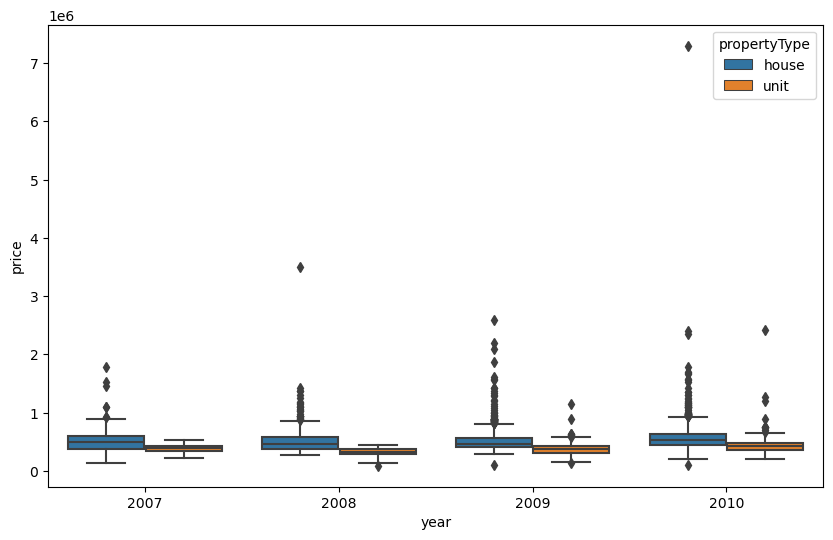

In [97]:
fig, ax = plt.subplots(figsize= (10,6))
sns.boxplot(data=df, x ='year', y = 'price', hue='propertyType', ax = ax)
plt.show()

In [98]:
# boxplot 개념

data = {'values' : [10,12,12,13,12,11,14,13,15,102,120,12,18,14,14,17,18,19,20]}
temp_df = pd.DataFrame(data)
temp_df[:5]

,values
0,10
1,12
2,12
3,13
4,12


In [99]:
# 1단계 : 사분위수 (1Q, 3Q, 2Q=median, IQR)
Q1 = temp_df['values'].quantile(0.25)
Q3 = temp_df['values'].quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)


12.0
18.0
6.0


In [100]:
# 2단계 : 이상치 임계값(threshold) 설정

lower_bound = Q1 - 1.5 * IQR # 하한가
upper_bound = Q3 + 1.5 * IQR # 상한가

print(lower_bound)
print()
print(upper_bound)

3.0

27.0


In [101]:
condition = (temp_df['values'] < lower_bound) | (temp_df['values'] > upper_bound)

In [102]:
# 3단계 : 이상치 확인 

temp_df.loc[condition, :]

,values
9,102
10,120


In [103]:
outlier = temp_df.loc[condition, :]
outlier

,values
9,102
10,120


In [104]:
# outlier 제외한 값 추출 
# loc[~,:] '~' : '제외한다' 는 의미 
temp_df.loc[~condition,:]

,values
0,10
1,12
2,12
3,13
4,12
5,11
6,14
7,13
8,15
11,12


In [105]:
# 4단계 : 이상치 처리 (제거, upper_bound, lower_bound로 편입)

# 1) 이상치 제거 >> 함수 remove_outlier 
df_clean = temp_df.loc[~condition,:]
print(df_clean[:5])

   values
0      10
1      12
2      12
3      13
4      12


In [106]:
temp_upper = temp_df.copy()
temp_upper.head()

,values
0,10
1,12
2,12
3,13
4,12


In [107]:
# 2) upper_bound에 편입 

temp_upper['values'] = temp_upper['values'].apply(lambda x: min(x, upper_bound))
temp_upper

,values
0,10.0
1,12.0
2,12.0
3,13.0
4,12.0
5,11.0
6,14.0
7,13.0
8,15.0
9,27.0


In [108]:
# 이상치 제거 함수 만들기 

def remove_outliers(df, column): 
  
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  
  lower_bound = Q1 - 1.5 * IQR # 하한가
  upper_bound = Q3 + 1.5 * IQR # 상한가
  
  condition = (df[column] < lower_bound) | (df[column] > upper_bound)
  
  outliers = df.loc[condition, :]
  df_clean = df.loc[~condition,:].reset_index(drop=True)
  
  return df_clean, outliers
    

In [109]:
remove_outliers(df, 'price')

(       datesold  postcode   price propertyType  bedrooms  year  month
 0    2007-02-07      2607  525000        house         4  2007      2
 1    2007-02-27      2906  290000        house         3  2007      2
 2    2007-03-07      2905  328000        house         3  2007      3
 3    2007-03-09      2905  380000        house         4  2007      3
 4    2007-03-21      2906  310000        house         3  2007      3
 ...         ...       ...     ...          ...       ...   ...    ...
 3576 2010-12-15      2612  415000         unit         1  2010     12
 3577 2010-12-20      2905  350000         unit         2  2010     12
 3578 2010-12-21      2612  640000         unit         2  2010     12
 3579 2010-12-24      2606  300000         unit         1  2010     12
 3580 2010-12-30      2602  389000         unit         2  2010     12
 
 [3581 rows x 7 columns],
         datesold  postcode    price propertyType  bedrooms  year  month
 7     2007-04-30      2606  1530000        hou

In [110]:
df_clean, outliers = remove_outliers(df, 'price')

print(df_clean)

       datesold  postcode   price propertyType  bedrooms  year  month
0    2007-02-07      2607  525000        house         4  2007      2
1    2007-02-27      2906  290000        house         3  2007      2
2    2007-03-07      2905  328000        house         3  2007      3
3    2007-03-09      2905  380000        house         4  2007      3
4    2007-03-21      2906  310000        house         3  2007      3
...         ...       ...     ...          ...       ...   ...    ...
3576 2010-12-15      2612  415000         unit         1  2010     12
3577 2010-12-20      2905  350000         unit         2  2010     12
3578 2010-12-21      2612  640000         unit         2  2010     12
3579 2010-12-24      2606  300000         unit         1  2010     12
3580 2010-12-30      2602  389000         unit         2  2010     12

[3581 rows x 7 columns]


In [111]:
print(outliers)

        datesold  postcode    price propertyType  bedrooms  year  month
7     2007-04-30      2606  1530000        house         4  2007      4
18    2007-07-07      2602   900000        house         4  2007      7
26    2007-07-21      2603  1780000        house         4  2007      7
60    2007-09-21      2603  1460000        house         5  2007      9
64    2007-09-24      2612   920000        house         4  2007      9
...          ...       ...      ...          ...       ...   ...    ...
24769 2009-10-22      2604   890000         unit         2  2009     10
24812 2010-01-22      2604  2425000         unit         3  2010      1
24843 2010-03-19      2604  1200000         unit         2  2010      3
24965 2010-10-29      2600  1275000         unit         3  2010     10
24974 2010-11-27      2604   890000         unit         3  2010     11

[186 rows x 7 columns]


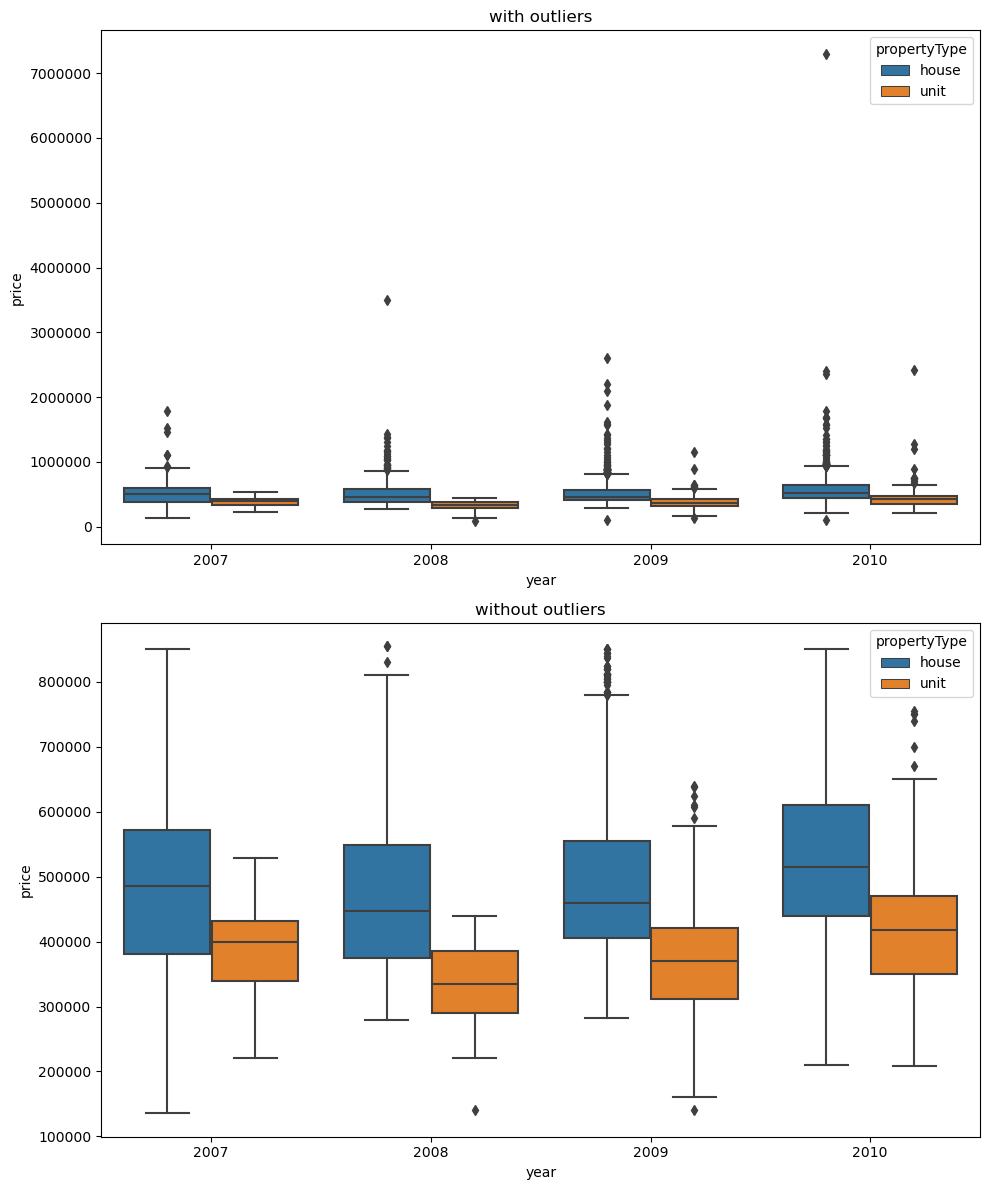

In [112]:
# 2007~2010 추출 결과 데이터 시각화

from matplotlib.ticker import ScalarFormatter 
formatter = ScalarFormatter()
formatter.set_scientific(False)
# 과학적 표기법 비활성 설정

fig, ax = plt.subplots(nrows=2, figsize=(10,12))
sns.boxplot(data = df, x = 'year', y ='price', hue='propertyType', ax=ax[0])
ax[0].set_title('with outliers')
ax[0].yaxis.set_major_formatter(formatter) 

sns.boxplot(data = df_clean, x ='year', y='price', hue='propertyType', ax=ax[1])
ax[1].set_title('without outliers')

plt.tight_layout()
plt.show()

In [113]:
# subplots 
# - 다수의 그래프를 하나의 창에 나누어 그리는데 사용 
# >> 개별적으로 조절 가능한 축 >> 'ax'

import seaborn as sns

# 데이터 가져오기 
tips = sns.load_dataset("tips")

tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages

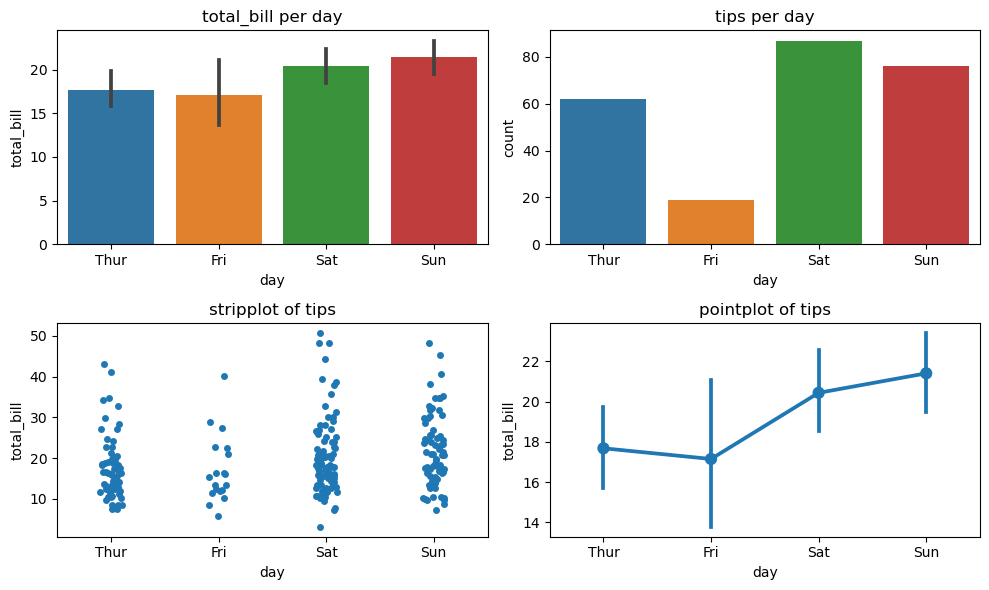

In [123]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

# 요일별 총 청구금액 시각화
sns.barplot(x='day', y='total_bill', data=tips, ax = ax[0,0])
ax[0,0].set_title('total_bill per day')

sns.countplot(x='day', data=tips, ax= ax[0,1])
ax[0,1].set_title('tips per day')

sns.stripplot(x="day", y='total_bill', data=tips, ax=ax[1,0])
ax[1,0].set_title('stripplot of tips')

sns.pointplot(x='day', y='total_bill', data=tips,ax=ax[1,1])
ax[1,1].set_title('pointplot of tips')

plt.tight_layout()
plt.show()


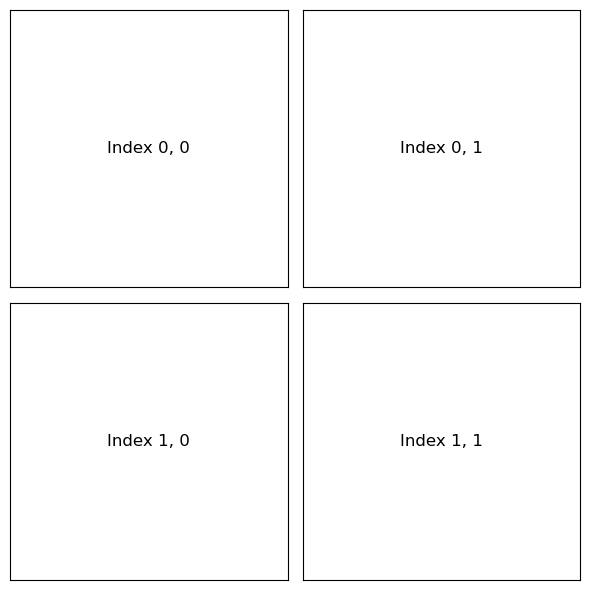

In [127]:
import matplotlib.pyplot as plt

# 설정: 2행 2열의 서브플롯 생성
nrows, ncols = 2, 2

# 서브플롯 생성
fig, axs = plt.subplots(nrows, ncols, figsize=(6, 6))

# 각 서브플롯에 인덱스 표시
for i in range(nrows):
    for j in range(ncols):
        axs[i, j].text(0.5, 0.5, f'Index {i}, {j}', 
                       ha='center', va='center', fontsize=12)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

plt.tight_layout()
plt.savefig("..\data\img\subplots.png")  #cf) mac os : ../data/ 
plt.show()

plotly

In [128]:
import plotly.express as px
df = px.data.tips()
fig = px.box(df, y="total_bill")
fig.show()

In [129]:
import plotly.io as pio
pio.renderers.default = 'jupyterlab'

In [133]:
import plotly.graph_objects as go  # 저수준(low level) 그래프 
import numpy as np

# 가상의 데이터 생성 
x = np.arange(0, 15, 1)

y1, y2 = x ** 2 , x ** 3

# print(y1)
# print(y2)

# figure 생성 
fig = go.Figure()

# 시각화 차트 
fig.add_trace(go.Scatter(x=x, y=y1))
# 지정한 x, y 값을 plotly를 이용해서 산점도를 그래프 트레이스에 더해줘 
fig.add_trace(go.Scatter(x=x, y=y2))
fig.add_trace  

# 시각화 차트 업데이트 

fig.update_layout(
  title = 'basic graph',
  xaxis_title = 'x 축', 
  yaxis_title = 'y 축', 
  template = 'plotly_white'
)

# 그래프 보여주기 
fig.show()

In [134]:
import plotly.graph_objects as go  # 저수준(low level) 그래프 
import numpy as np

# 가상의 데이터 생성 
x = np.arange(0, 15, 1)

y1, y2 = x ** 2 , x ** 3

# print(y1)
# print(y2)

# figure 생성 
fig = go.Figure()

# 시각화 차트 
for y in [y1, y2]: 
  fig.add_trace(go.Scatter(x=x, y=y))

# 시각화 차트 업데이트 

fig.update_layout(
  title = 'basic graph',
  xaxis_title = 'x 축', 
  yaxis_title = 'y 축', 
  template = 'plotly_white'
)

# 그래프 보여주기 
fig.show()

In [135]:
data = {
  'x' : ['a','b','c','d'], 
  'y1': [10,15,13,17], 
  'y2':[16,8,13,10]
}

In [140]:
# 기본차트 
fig = px.bar(data, x='x', y='y1', title='basic chart')

# 차트 추가 
fig.add_trace(go.Scatter(x = data['x'], y=data['y2'], 
                          mode='lines+markers', name='Line Chart'
                          ))

# 막대 차트 
fig.update_traces(marker_color = 'lightblue', selector=dict(type='scatter'))
# selector=dict(type='scatter') 
# 업데이트가 type이 scatter(산점도) 타입의 트레이스(trace) 만 적용 해줘 

fig.show()

In [141]:
# 선그래프 (line graph)

import numpy as np 
import pandas as pd
import plotly
import plotly.express as px 

sales

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3,2019,7
29576,2019-07-25,2612,560000,unit,2,2019,7
29577,2019-07-26,2912,464950,unit,2,2019,7
29578,2019-07-26,2601,589000,unit,2,2019,7


In [142]:
sales.groupby('year')['price'].agg('mean')

year
2007    522377.210884
2008    493814.162754
2009    496092.032959
2010    559564.810289
2011    566715.110227
2012    552501.369214
2013    553416.296838
2014    592653.761439
2015    626101.342654
2016    635185.311668
2017    671880.551420
2018    660701.042768
2019    634184.218773
Name: price, dtype: float64

In [144]:
result = sales.groupby('year')['price'].agg('mean')
result[:5]

year
2007    522377.210884
2008    493814.162754
2009    496092.032959
2010    559564.810289
2011    566715.110227
Name: price, dtype: float64

In [146]:
fig = px.line(result, x=result.index, 
              y=result.values,
              title='연도별 평균 집 값 추이')
fig.show()

In [148]:
# 선그래프 

sales.columns

Index(['datesold', 'postcode', 'price', 'propertyType', 'bedrooms', 'year',
       'month'],
      dtype='object')

In [149]:
sales['datesold']

0       2007-02-07
1       2007-02-27
2       2007-03-07
3       2007-03-09
4       2007-03-21
           ...    
29575   2019-07-25
29576   2019-07-25
29577   2019-07-26
29578   2019-07-26
29579   2019-07-26
Name: datesold, Length: 29580, dtype: datetime64[ns]

In [150]:
sales['datesold'].dt.month

0        2
1        2
2        3
3        3
4        3
        ..
29575    7
29576    7
29577    7
29578    7
29579    7
Name: datesold, Length: 29580, dtype: int32

In [152]:
sales['month'] = sales['datesold'].dt.month
sales['year'] = sales['datesold'].dt.year

sales.head(3)

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3


In [153]:
sales.tail(2)

,datesold,postcode,price,propertyType,bedrooms,year,month
29578,2019-07-26,2601,589000,unit,2,2019,7
29579,2019-07-26,2612,775000,unit,2,2019,7


In [155]:
# 2008년 vs 2018년 비교하고 파

condition = sales['year'].isin([2008,2018])

df = sales[condition]
df

,datesold,postcode,price,propertyType,bedrooms,year,month
130,2008-01-02,2906,309000,house,2,2008,1
131,2008-01-14,2602,413000,house,3,2008,1
132,2008-01-15,2905,445000,house,4,2008,1
133,2008-01-15,2902,600000,house,4,2008,1
134,2008-01-17,2605,417500,house,2,2008,1
...,...,...,...,...,...,...,...
29212,2018-12-21,2615,323000,unit,2,2018,12
29213,2018-12-21,2604,475000,unit,2,2018,12
29214,2018-12-21,2914,495000,unit,3,2018,12
29215,2018-12-21,2602,535000,unit,3,2018,12


In [156]:
df.groupby(['year','month'])['price'].agg('mean')

year  month
2008  1        504428.571429
      2        531080.000000
      3        563500.000000
      4        534204.545455
      5        522394.736842
      6        539092.647059
      7        537453.125000
      8        449510.416667
      9        496778.651685
      10       454822.043011
      11       489546.330275
      12       494410.810811
2018  1        590753.808140
      2        666738.265854
      3        717516.058824
      4        665040.377095
      5        669840.556561
      6        660528.720238
      7        628073.993289
      8        629684.079208
      9        658647.394464
      10       655744.728223
      11       654334.517241
      12       674591.105023
Name: price, dtype: float64

In [157]:
df.groupby(['year','month'])['price'].agg('mean').reset_index()

,year,month,price
0,2008,1,504428.571429
1,2008,2,531080.000000
2,2008,3,563500.000000
3,2008,4,534204.545455
4,2008,5,522394.736842
5,2008,6,539092.647059
6,2008,7,537453.125000
7,2008,8,449510.416667
8,2008,9,496778.651685
9,2008,10,454822.043011


In [158]:
result = round(df.groupby(['year','month'])['price'].agg('mean').reset_index(),1)

result.head()

,year,month,price
0,2008,1,504428.6
1,2008,2,531080.0
2,2008,3,563500.0
3,2008,4,534204.5
4,2008,5,522394.7


In [159]:
import plotly.io as pio 

pio.templates.default = 'plotly_white'

fig = px.line(result, x='month', y='price', 
              color='year', title='2008 vs 2018 월별 집값 평균 비교')

fig.show()

In [160]:
# 막대그래프 

import pandas as pd 
import plotly 
import numpy as np 

result.head(3)

,year,month,price
0,2008,1,504428.6
1,2008,2,531080.0
2,2008,3,563500.0


In [161]:
# 다중차트 그리기 

from plotly.subplots import make_subplots  
import plotly.io as pio
import plotly.graph_objects as go 

In [168]:
pio.templates.default = 'plotly_white'

fig = make_subplots(rows=2, cols=1, 
                    subplot_titles=("2008년 차트", "2018년 차트"))


for i, year in enumerate([2008,2018]): 
  # print(i, year)
  data = result.loc[result['year']==year, :]
  # print(data)
  fig.add_trace(go.Bar(x=data['month'], y=data['price'], name=str(year)),       
                row=i+1, col=1)

fig.update_layout(title='average house price by month and year', 
                  xaxis_title='month', 
                  yaxis_title='price', 
                  height=500
                  )

fig.show()


In [175]:
import plotly.graph_objects as go 
import pandas as pd 

# map 
month_map = {1: "1월", 2:"2월", 3:"3월", 4:"4월", 5:"5월", 6:"6월",
             7: "JULY", 8:"AUG", 9:"SEP", 10:"OCT", 11:"NOV", 12:"DEC"}

# 매핑한 '월' 생성
result['month_map'] = result['month'].map(month_map)

result.head()

fig = go.Figure()

# 막대그래프 
for year in [2008,2018]: 
    yearly_data = result[result['year'] == year]
    fig.add_trace(go.Bar(
      x = yearly_data['month_map'], 
      y = yearly_data['price'], 
      name = str(year), 
      marker_color='blue' if year == 2008 else 'red'
    ))
    
# 업데이트 레이아웃 
fig.update_layout(
  barmode = 'group',
  title = "평균 가격 비교(2008 vs 2018)", 
  xaxis = dict(
    tickmode='array', 
    tickvals = list(month_map.values()), 
    ticktext = list(month_map.values()) 
  ), 
  yaxis_title = '평균가격', 
  height=500
)

fig.show()


In [172]:
result
result['month']
result['month'].map(month_map)

0       1월
1       2월
2       3월
3       4월
4       5월
5       6월
6     JULY
7      AUG
8      SEP
9      OCT
10     NOV
11     DEC
12      1월
13      2월
14      3월
15      4월
16      5월
17      6월
18    JULY
19     AUG
20     SEP
21     OCT
22     NOV
23     DEC
Name: month, dtype: object

In [176]:
# Butterfly Chart 

pio.templates.default = 'plotly_white'

result

,year,month,price,month_map
0,2008,1,504428.6,1월
1,2008,2,531080.0,2월
2,2008,3,563500.0,3월
3,2008,4,534204.5,4월
4,2008,5,522394.7,5월
5,2008,6,539092.6,6월
6,2008,7,537453.1,JULY
7,2008,8,449510.4,AUG
8,2008,9,496778.7,SEP
9,2008,10,454822.0,OCT


In [179]:
data_2008 = result.loc[result['year'] == 2008, :]
data_2008

,year,month,price,month_map
0,2008,1,504428.6,1월
1,2008,2,531080.0,2월
2,2008,3,563500.0,3월
3,2008,4,534204.5,4월
4,2008,5,522394.7,5월
5,2008,6,539092.6,6월
6,2008,7,537453.1,JULY
7,2008,8,449510.4,AUG
8,2008,9,496778.7,SEP
9,2008,10,454822.0,OCT


In [178]:
data_2018 = result.loc[result['year'] == 2018, :]
data_2018

,year,month,price,month_map
12,2018,1,590753.8,1월
13,2018,2,666738.3,2월
14,2018,3,717516.1,3월
15,2018,4,665040.4,4월
16,2018,5,669840.6,5월
17,2018,6,660528.7,6월
18,2018,7,628074.0,JULY
19,2018,8,629684.1,AUG
20,2018,9,658647.4,SEP
21,2018,10,655744.7,OCT


In [180]:
# 천(1000) 단위 구분 
[x for x in data_2008['price']]

[504428.6,
 531080.0,
 563500.0,
 534204.5,
 522394.7,
 539092.6,
 537453.1,
 449510.4,
 496778.7,
 454822.0,
 489546.3,
 494410.8]

In [181]:
[f'{x:,.0f}'for x in data_2008['price']]

['504,429',
 '531,080',
 '563,500',
 '534,204',
 '522,395',
 '539,093',
 '537,453',
 '449,510',
 '496,779',
 '454,822',
 '489,546',
 '494,411']

In [182]:
formatted_price_2008 = [f'{x:,.0f}'for x in data_2008['price']]
formatted_price_2018 = [f'{x:,.0f}'for x in data_2018['price']]

print(formatted_price_2008)
print()
print(formatted_price_2018)

['504,429', '531,080', '563,500', '534,204', '522,395', '539,093', '537,453', '449,510', '496,779', '454,822', '489,546', '494,411']

['590,754', '666,738', '717,516', '665,040', '669,841', '660,529', '628,074', '629,684', '658,647', '655,745', '654,334', '674,591']


In [191]:
# 버터플라이 그래프 그리기 

fig = go.Figure()

# 2008년 
fig.add_trace(go.Bar(
  x=data_2008['price'], 
  y=data_2008['month'],
  name = '2008년', 
  marker_color = 'blue', 
  orientation='h', # 막대그래프를 가로형(horizontal)
  text=formatted_price_2008, 
  textposition='inside'  
))

# 2018년 
fig.add_trace(go.Bar(
  x=data_2018['price'], 
  y=data_2018['month'],
  name = '2018년', 
  marker_color = 'red', 
  orientation='h', # 막대그래프를 가로형(horizontal)
  text=formatted_price_2018, 
  textposition='inside'  
))

fig.update_layout(
  title = '평균가격 비교: 2008년 vs 2018년',
  xaxis_title = '',       # x축 제목(비어둠)
  showlegend=False,       # 범례 표시
  barmode='relative',     # BAR MODE (상대적 위치 지정)
  bargap = 0.25,          # BAR 간격
  height = 500,           # 그래프 높이 설정 
  # 주석(추가적인 텍스트) 추가 
  annotations= [          
      dict(x=0.25, y=1.07, xref='paper', yref='paper', text='2008', showarrow=False, font=dict(color='blue', size=14)), 
      dict(x=0.25, y=1.07, xref='paper', yref='paper', text='2018', showarrow=False, font=dict(color='red', size=14))
    
  ]
  
  # x=0.25 : 그래프 가로 길이의 25% 위치 
  # xref = 'paper' : 전체 그래프 영역 기준, 좌표 설정 
  # showarrow=False : 주석에 화살표 표시  
  
)
fig.show()

In [192]:
# box plot 

pio.templates.default = 'plotly_white'

sales 

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3,2019,7
29576,2019-07-25,2612,560000,unit,2,2019,7
29577,2019-07-26,2912,464950,unit,2,2019,7
29578,2019-07-26,2601,589000,unit,2,2019,7


In [201]:
df = sales[sales['year'].isin([2007,2008,2009,2010])]
df

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
24983,2010-12-15,2612,415000,unit,1,2010,12
24984,2010-12-20,2905,350000,unit,2,2010,12
24985,2010-12-21,2612,640000,unit,2,2010,12
24986,2010-12-24,2606,300000,unit,1,2010,12


In [202]:
df = df[df['price'] <= 700000]

In [203]:
df

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
24983,2010-12-15,2612,415000,unit,1,2010,12
24984,2010-12-20,2905,350000,unit,2,2010,12
24985,2010-12-21,2612,640000,unit,2,2010,12
24986,2010-12-24,2606,300000,unit,1,2010,12


In [204]:
fig = px.box(df, x ='year', y='price', color='propertyType', 
              points='all', hover_data=df.columns
              )
# points : 개별 데이터 포인트 표시 
# hover_data : data에 마우스 갖다 대면 데이터의 정보 표시 

fig.show()

In [212]:
df.columns
[f'{col}:{df[col]}' for col in df.columns]

df.apply(lambda row: '<br>'.join([f'{col}:{row[col]}' for col in df.columns]), axis=1)

0        datesold:2007-02-07 00:00:00<br>postcode:2607<...
1        datesold:2007-02-27 00:00:00<br>postcode:2906<...
2        datesold:2007-03-07 00:00:00<br>postcode:2905<...
3        datesold:2007-03-09 00:00:00<br>postcode:2905<...
4        datesold:2007-03-21 00:00:00<br>postcode:2906<...
                               ...                        
24983    datesold:2010-12-15 00:00:00<br>postcode:2612<...
24984    datesold:2010-12-20 00:00:00<br>postcode:2905<...
24985    datesold:2010-12-21 00:00:00<br>postcode:2612<...
24986    datesold:2010-12-24 00:00:00<br>postcode:2606<...
24987    datesold:2010-12-30 00:00:00<br>postcode:2602<...
Length: 3306, dtype: object

In [208]:
def format_hover_text(df): 
  return df.apply(lambda row: '<br>'.join([f'{col}:{row[col]}' for col in df.columns]), axis=1)

format_hover_text(sales.loc[sales['propertyType'] == 'unit'])

24552    datesold:2007-06-27 00:00:00<br>postcode:2606<...
24553    datesold:2007-07-05 00:00:00<br>postcode:2611<...
24554    datesold:2007-07-19 00:00:00<br>postcode:2607<...
24555    datesold:2007-07-20 00:00:00<br>postcode:2604<...
24556    datesold:2007-08-07 00:00:00<br>postcode:2617<...
                               ...                        
29575    datesold:2019-07-25 00:00:00<br>postcode:2900<...
29576    datesold:2019-07-25 00:00:00<br>postcode:2612<...
29577    datesold:2019-07-26 00:00:00<br>postcode:2912<...
29578    datesold:2019-07-26 00:00:00<br>postcode:2601<...
29579    datesold:2019-07-26 00:00:00<br>postcode:2612<...
Length: 5028, dtype: object

In [215]:
sales

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3,2019,7
29576,2019-07-25,2612,560000,unit,2,2019,7
29577,2019-07-26,2912,464950,unit,2,2019,7
29578,2019-07-26,2601,589000,unit,2,2019,7


In [219]:
def format_hover_text(df): 
  return df.apply(lambda row: '<br>'.join([f'{col}:{row[col]}' for col in df.columns]), axis=1)


fig = go.Figure()

fig.add_trace(
  go.Box(
    x = sales.loc[sales['propertyType'] == 'house', 'year'],
    y = sales['price'], name='house', 
    boxpoints='all', pointpos = -1.8
  )
)

fig.add_trace(
  go.Box(
    x = sales.loc[sales['propertyType'] == 'unit', 'year'],
    y = sales['price'], name='unit', 
    hoverinfo = 'text', 
    text = format_hover_text(sales.loc[sales['propertyType'] == 'unit'])
  )
)

fig.update_traces(hoverlabel = dict(bgcolor='rgba(255,99,71,0.3)'), 
                  selector=dict(name='unit'))

fig.update_layout(boxmode='group')

fig.show()

In [221]:
def format_hover_text(df): 
  return df.apply(lambda row: '<br>'.join([f'{col}:{row[col]}' for col in df.columns]), axis=1)


fig = go.Figure()

fig.add_trace(
  go.Box(
    x = df.loc[df['propertyType'] == 'house', 'year'],
    y = df['price'], name='house', 
    boxpoints='all', pointpos = -1.8
  )
)

fig.add_trace(
  go.Box(
    x = df.loc[df['propertyType'] == 'unit', 'year'],
    y = df['price'], name='unit', 
    hoverinfo = 'text', 
    text = format_hover_text(df.loc[df['propertyType'] == 'unit'])
  )
)

fig.update_traces(hoverlabel = dict(bgcolor='rgba(255,99,71,0.3)'), 
                  selector=dict(name='unit'))

fig.update_layout(boxmode='group')

fig.show()

In [222]:
# plotly chart 
import plotly.express as px 
import plotly.graph_objs as go 
import pandas as pd 

df = px.data.tips()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [223]:
df.groupby('day')[['total_bill','tip']].mean()

,total_bill,tip
day,,
Fri,17.151579,2.734737
Sat,20.441379,2.993103
Sun,21.410000,3.255132
Thur,17.682742,2.771452


In [224]:
df.groupby('day')[['total_bill','tip']].mean().index

Index(['Fri', 'Sat', 'Sun', 'Thur'], dtype='object', name='day')

In [225]:
df.groupby('day')[['total_bill','tip']].mean().reset_index()

,day,total_bill,tip
0,Fri,17.151579,2.734737
1,Sat,20.441379,2.993103
2,Sun,21.410000,3.255132
3,Thur,17.682742,2.771452


In [247]:
avg_df = df.groupby('day')[['total_bill','tip']].mean().reset_index()

In [248]:
day_order = ['Thursday','Friday','Saturday','Sunday' ]
day_full_names = {'Thur':'Thursday', 'Fri':'Friday', 'Sat':'Saturday', 'Sun':'Sunday'}

In [249]:
avg_df

,day,total_bill,tip
0,Fri,17.151579,2.734737
1,Sat,20.441379,2.993103
2,Sun,21.410000,3.255132
3,Thur,17.682742,2.771452


In [250]:
avg_df['day'].map(day_full_names)

0      Friday
1    Saturday
2      Sunday
3    Thursday
Name: day, dtype: object

In [251]:
avg_df['day'] = avg_df['day'].map(day_full_names)

In [252]:
avg_df

,day,total_bill,tip
0,Friday,17.151579,2.734737
1,Saturday,20.441379,2.993103
2,Sunday,21.410000,3.255132
3,Thursday,17.682742,2.771452


In [253]:
pd.Categorical(avg_df['day'], categories=day_order)

['Friday', 'Saturday', 'Sunday', 'Thursday']
Categories (4, object): ['Thursday', 'Friday', 'Saturday', 'Sunday']

In [254]:
avg_df['day'] = pd.Categorical(avg_df['day'], categories=day_order)

In [255]:
avg_df

,day,total_bill,tip
0,Friday,17.151579,2.734737
1,Saturday,20.441379,2.993103
2,Sunday,21.410000,3.255132
3,Thursday,17.682742,2.771452


In [256]:
avg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   day         4 non-null      category
 1   total_bill  4 non-null      float64 
 2   tip         4 non-null      float64 
dtypes: category(1), float64(2)
memory usage: 404.0 bytes


In [257]:
avg_df.sort_values('day')

,day,total_bill,tip
3,Thursday,17.682742,2.771452
0,Friday,17.151579,2.734737
1,Saturday,20.441379,2.993103
2,Sunday,21.410000,3.255132


In [258]:
avg_df.sort_values('day').reset_index(drop=True)

,day,total_bill,tip
0,Thursday,17.682742,2.771452
1,Friday,17.151579,2.734737
2,Saturday,20.441379,2.993103
3,Sunday,21.410000,3.255132


In [259]:
avg_df = avg_df.sort_values('day').reset_index(drop=True)
avg_df

,day,total_bill,tip
0,Thursday,17.682742,2.771452
1,Friday,17.151579,2.734737
2,Saturday,20.441379,2.993103
3,Sunday,21.410000,3.255132


In [261]:
avg_df['day'].values

['Thursday', 'Friday', 'Saturday', 'Sunday']
Categories (4, object): ['Thursday', 'Friday', 'Saturday', 'Sunday']

In [266]:
fig = px.bar(avg_df, x='day', y='tip',labels={'tip':"average total bill"}, 
              text_auto='.2s', color='day', 
              color_discrete_map = {'Thurday':'gray', 'Friday':'gray','Saturday':'gray','Sunday':'red'})

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

colors = ['red' if day == 'Sunday' else 'gray' for day in avg_df['day'].values]

fig.add_trace(go.Scatter(x= avg_df['day'], y=avg_df['total_bill'], 
                         mode='lines+markers', name = 'average_bill', 
                         line=dict(color='darkgray', width=2), 
                         marker=dict(color=colors, size=8)
                         ))

# y 축 정의 grid lines 
max_value = max(avg_df['total_bill'].max(), avg_df['tip'].max())
yaxis_range = round(max_value + 7 - (max_value % 10))

# x 축, y 축 범례 정의 
fig.update_layout(
  title = 'Average Total Bill and Tip by Day', 
  xaxis = dict(
    title='Day of the Week', 
    tickmode='array', 
    tickvals=day_order
  ), 
  yaxis = dict(
    title = 'Average Amount(US$)', 
    range=[0, yaxis_range], 
    tickmode='linear',  
    # tick : 눈금자, tickmode='linear' 눈금이 선형적으로 배치 
    tick0=0,  # tick0 : y축의 첫번째(0) 눈금의 위치 정의 
    dtick=5,  
    # dtick : distance of tick 눈금 거리 (눈금 간 간격) 각 눈금은 5단위
    showgrid=True, 
    gridcolor='lightgray',
    gridwidth = 0.5, 
    griddash = 'dot'
  ), 
  plot_bgcolor='white', 
  legend_title='Data Type', 
  legend = dict(
    orientation='h', 
    x = 0.5, 
    xanchor='center', 
    y = -0.5, 
    yanchor='bottom', 
    bgcolor='rgba(255, 255, 255, 0.5)', 
    bordercolor='Black'
  )
  
)

# y축 grid line 추가 
for i in range(10, yaxis_range+1, 10): 
  fig.add_shape(
    type="line",
    x0 = -0.5, 
    y0 = i, 
    x1 = 3.5, 
    y1 = i, 
    line_dash ='dot', 
    line=dict(color='black', width=1)
  )

fig.show()


c:\ProgramData\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [262]:
max_value = max(avg_df['total_bill'].max(), avg_df['tip'].max())
print(max_value)

21.41


In [263]:
round(max_value + 7 - (max_value % 10))

27